In [49]:
from pathlib import Path

from pose_cond_tools.dataset_tools import AnimalPoseTools

dataset_tools = AnimalPoseTools("/local/scratch/carlyn.1/datasets/animalpose/")
dataset_tools.annotation_data.keys()

dict_keys(['images', 'annotations', 'categories', 'info'])

In [50]:
import os
import shutil

# We have to extract images from pascal 2011
path_to_pascal_voc = Path(
    "/local/scratch/carlyn.1/datasets/animalpose/voc/TrainVal/VOCdevkit/VOC2011/JPEGImages"
)
animalpose_image_dir = Path("/local/scratch/carlyn.1/datasets/animalpose/images")

# for k, v in ann_data["images"].items():
#    if len(v.split("_")) > 1: # Must be pascal image naming
#        src = path_to_pascal_voc / v
#        dest = animalpose_image_dir / v
#        if not os.path.exists(src):
#            print(f"{src} does not exist.")
#        shutil.copyfile(src, dest)


In [51]:
img_paths = dataset_tools.get_image_paths()

print(len(img_paths))

4608


In [52]:
img_path, ann_point = dataset_tools.sample_random()

img_path

'/local/scratch/carlyn.1/datasets/animalpose/images/2010_002551.jpg'

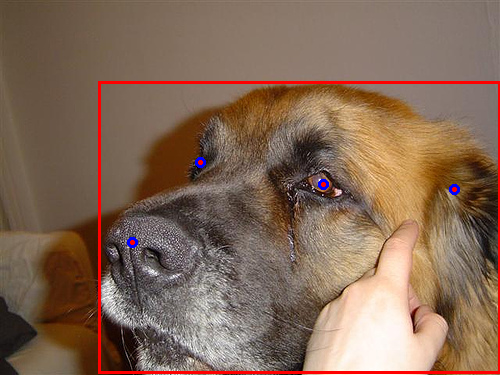

In [53]:
from PIL import Image, ImageDraw

img = Image.open(img_path)

imd = ImageDraw.Draw(img)

keypoints = dataset_tools.get_keypoints(ann_point, get_only_visible=True)
bbox = dataset_tools.get_bbox(ann_point)

r = 5
for x, y in keypoints:
    imd.ellipse((x - r, y - r, x + r, y + r), fill="red", outline="blue", width=3)

x1, y1, x2, y2 = bbox
imd.rectangle((x1, y1, x2, y2), fill=None, outline="red", width=3)

img

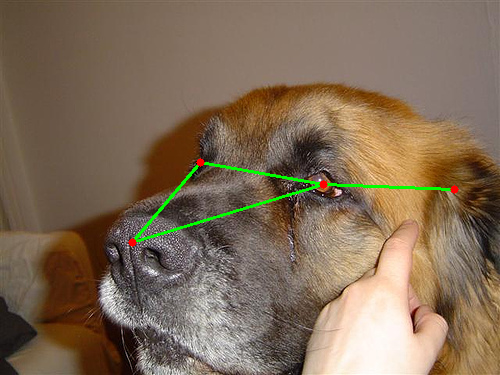

In [54]:
img = dataset_tools.create_pose_image(ann_point)
img

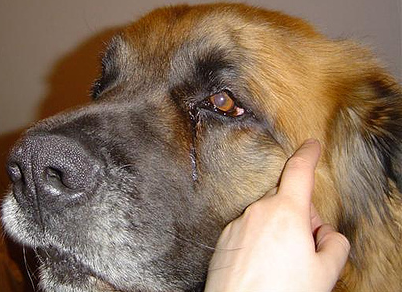

In [55]:
img = Image.open(img_path)
keypoints = dataset_tools.get_keypoints(ann_point, keep_visible=True)
bbox = dataset_tools.get_bbox(ann_point)
cropped_img, cropped_keypoints = dataset_tools.crop_img_and_adjust_points(
    img, bbox, keypoints
)

cropped_img

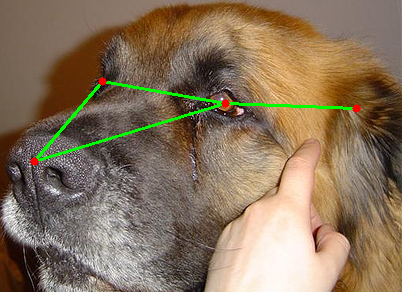

In [56]:
img = dataset_tools.create_pose_image(
    ann_point, keypoints=cropped_keypoints, image=cropped_img
)
img